# Graphes - correction

Pour avoir des graphiques inclus dans le notebook, il faut ajouter cette ligne et l'exécuter en premier.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


On change le style pour un style plus moderne, celui de [ggplot](http://ggplot2.org/) :

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [1]:
import pyensae
%nb_menu

## Données

### élections

Pour tous les exemples qui suivent, on utilise les résultat [élection présidentielle de 2012](https://www.data.gouv.fr/fr/datasets/election-presidentielle-2012-resultats-572124/). Si vous n'avez pas le module [actuariat_python](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/index.html), il vous suffit de recopier le code de la fonction [elections_presidentielles](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/_modules/actuariat_python/data/elections.html#elections_presidentielles) qui utilise la fonction [read_excel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) :

In [4]:
from actuariat_python.data import elections_presidentielles
dict_df = elections_presidentielles()

In [5]:
deps = dict_df["Départements T1"].merge(dict_df["Départements T2"], 
                                       on="Code du département",
                                       suffixes=("T1", "T2"))
deps["rHollandeT1"] = deps["Voix.9"] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rSarkozyT1"] = deps["Voix.2"] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rNulT1"] = deps["Blancs et nulsT1"] / deps["VotantsT1"]
deps["rHollandeT2"] = deps["VoixT2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rSarkozyT2"] = deps["Voix.1T2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rNulT2"] = deps["Blancs et nulsT2"] / deps["VotantsT2"]
data = deps[["Code du département", "Libellé du départementT1", 
             "VotantsT1", "rHollandeT1", "rSarkozyT1", "rNulT1",
             "VotantsT2", "rHollandeT2", "rSarkozyT2", "rNulT2"]]
data_elections = data # parfois data est remplacé dans la suite
data.head()


,Code du département,Libellé du départementT1,VotantsT1,rHollandeT1,rSarkozyT1,rNulT1,VotantsT2,rHollandeT2,rSarkozyT2,rNulT2
0,1,AIN,327812,0.227459,0.304090,0.019685,326587,0.427692,0.572308,0.059748
1,2,AISNE,303140,0.271027,0.241958,0.017141,302076,0.524020,0.475980,0.069704
2,3,ALLIER,211009,0.296824,0.240238,0.023975,211132,0.568861,0.431139,0.070686
3,4,ALPES DE HAUTE PROVENCE,102899,0.243591,0.254673,0.020515,103581,0.510594,0.489406,0.064095
4,5,HAUTES ALPES,88619,0.244858,0.261071,0.020786,89405,0.508935,0.491065,0.067390


### localisation des villes

In [23]:
import pyensae
pyensae.download_data("villes_france.csv", url="http://sql.sh/ressources/sql-villes-france/")
cols = ["ncommune", "numero_dep", "slug", "nom", "nom_simple", "nom_reel", "nom_soundex", "nom_metaphone", "code_postal",
    "numero_commune", "code_commune", "arrondissement", "canton", "pop2010", "pop1999", "pop2012",
    "densite2010", "surface", "superficie", "dlong", "dlat", "glong", "glat", "slong", "slat", "alt_min", "alt_max"]
import pandas
villes = pandas.read_csv("villes_france.csv", header=None,low_memory=False, names=cols)

## exercice 1 : centrer la carte de la France

On recentre la carte. Seule modification : ``llcrnrlon=-5, llcrnrlat=40, urcrnrlon=12, urcrnrlat=51,``. La Corse est légèrement tronquée.

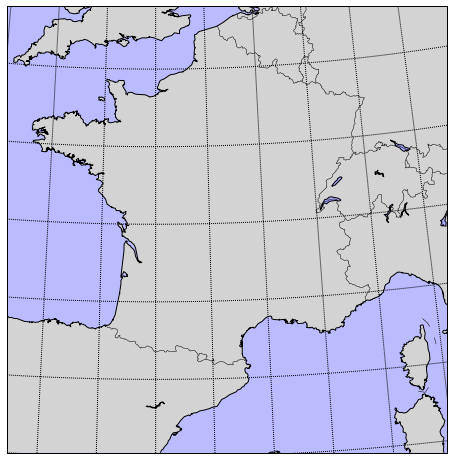

In [17]:
from mpl_toolkits.basemap import Basemap
import numpy

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8,8))

m = Basemap(llcrnrlon=-5, llcrnrlat=40, urcrnrlon=12, urcrnrlat=51,
            resolution='i',projection='cass',lon_0=0,lat_0=0,
           ax=axes)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

m.drawparallels(numpy.arange(-40,61.,2.))
m.drawmeridians(numpy.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='#BBBBFF')

## exercice 2 : placer les plus grandes villes de France sur la carte

On reprend la fonction ``carte_france`` donnée par l'énoncé et modifié avec le résultat de la question précédente.

In [31]:
def carte_france():
    from mpl_toolkits.basemap import Basemap
    import numpy

    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 1, figsize=(8,8))

    m = Basemap(llcrnrlon=-5, llcrnrlat=40, urcrnrlon=12, urcrnrlat=51,
                resolution='i',projection='cass',lon_0=2.34,lat_0=48,
               ax=axes)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

    m.drawparallels(numpy.arange(-40,61.,2.))
    m.drawmeridians(numpy.arange(-20.,21.,2.))
    m.drawmapboundary(fill_color='#BBBBFF')
    return m, axes

On ne retient que les villes de plus de 100.000 habitants. Toutes les villes ne font pas partie de la métropole :

In [32]:
grosses_villes = villes[villes.pop2012 > 100000][["dlong","dlat","nom", "pop2012"]]
grosses_villes.describe()

,dlong,dlat,pop2012
count,37.000000,37.000000,37.000000
mean,4.182151,45.579735,243264.729730
std,7.746851,7.749732,343428.823942
min,-4.483330,1.718190,103552.000000
25%,1.083330,44.833300,124152.000000
50%,3.083330,47.316700,149649.000000
75%,5.433330,48.683300,206194.000000
max,46.710700,50.633300,2125851.000000


In [33]:
grosses_villes.sort_values("dlat").head()

,dlong,dlat,nom,pop2012
36665,46.71070,1.71819,SAINT-DENIS,131649
27142,2.88333,42.68330,PERPIGNAN,105096
33675,5.93333,43.11670,TOULON,160712
4438,5.37639,43.29670,MARSEILLE,797491
4419,5.43333,43.53330,AIX-EN-PROVENCE,134324


Saint-Denis est à la Réunion. On l'enlève de l'ensemble :

In [34]:
grosses_villes = villes[(villes.pop2012 > 100000) & (villes.dlat > 40)] \
        [["dlong","dlat","nom", "pop2012"]]

On dessine la carte souhaitée en ajoutant un marqueur pour chaque ville dont la surface dépend du nombre d'habitant. Sa taille doit être proportionnelle à à la racine carrée du nombre d'habitants.

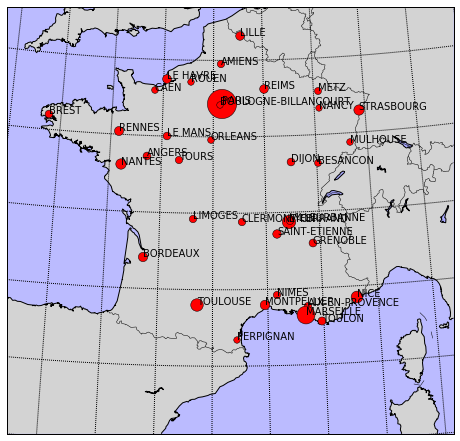

In [38]:
import matplotlib.pyplot as plt
m, ax = carte_france()

def affiche_ville(m, ax, lon, lat, nom, pop):
    x,y = m(lon, lat)
    ax.plot(x, y, 'ro', markersize=pop**0.5/50)
    ax.text(x, y, nom)

for lon, lat, nom, pop in zip(grosses_villes["dlong"],
                         grosses_villes["dlat"],
                         grosses_villes["nom"],
                        grosses_villes["pop2012"]):
    affiche_ville(m, ax, lon, lat, nom, pop)
ax

**rappel : fonction zip**
    
La fonction [zip](https://docs.python.org/3.4/library/functions.html#zip) *colle* deux séquences ensemble.

In [39]:
list(zip([1,2,3], ["a", "b", "c"]))

[(1, 'a'), (2, 'b'), (3, 'c')]

On l'utilise souvent de cette manière :

In [41]:
for a,b in zip([1,2,3], ["a", "b", "c"]):
    # faire quelque chose avec a et b
    print(a,b)

1 a
2 b
3 c


Sans la fonction [zip](https://docs.python.org/3.4/library/functions.html#zip) :

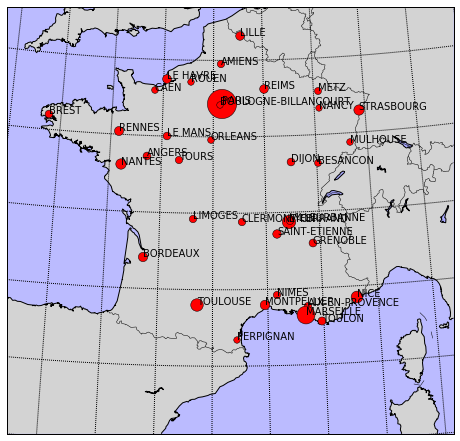

In [43]:
import matplotlib.pyplot as plt
m, ax = carte_france()

def affiche_ville(m, ax, lon, lat, nom, pop):
    x,y = m(lon, lat)
    ax.plot(x, y, 'ro', markersize=pop**0.5/50)
    ax.text(x, y, nom)
    
def affiche_row(m, ax, row):
    affiche_ville(m, ax, row["dlong"], row["dlat"], row["nom"], row["pop2012"])

grosses_villes.apply(lambda row: affiche_row(m, ax, row), axis=1)
ax

Ou encore :

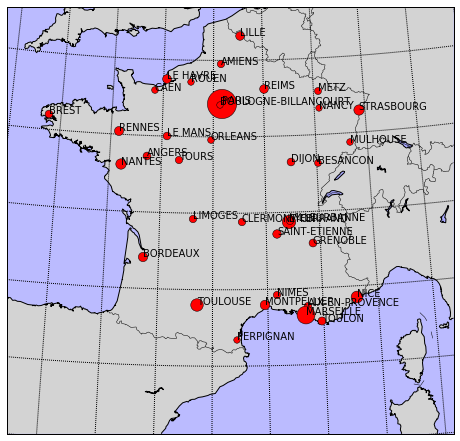

In [47]:
import matplotlib.pyplot as plt
m, ax = carte_france()

def affiche_ville(m, ax, lon, lat, nom, pop):
    x,y = m(lon, lat)
    ax.plot(x, y, 'ro', markersize=pop**0.5/50)
    ax.text(x, y, nom)

for i in range(0, grosses_villes.shape[0]):
    ind = grosses_villes.index[i]
    # important ici, les lignes sont indexées par rapport à l'index de départ
    # comme les lignes ont été filtrées pour ne garder que les grosses villes,
    # il faut soit utiliser reset_index soit récupérer l'indice de la ligne
    lon, lat = grosses_villes.ix[ind, "dlong"], grosses_villes.ix[ind, "dlat"]
    nom, pop = grosses_villes.ix[ind, "nom"], grosses_villes.ix[ind, "pop2012"]
    affiche_ville(m, ax, lon, lat, nom, pop)
ax

## exercice 3 : résultats des élections par département

On reprend le résultat des élections, on construit d'abord un dictionnaire dans lequel ``{ departement: vainqueur }``.

In [59]:
data_elections.shape, data_elections[data_elections.rHollandeT2 > data_elections.rSarkozyT2].shape

((107, 11), (63, 11))

Il y a 63 départements où Hollande est vainqueur.

In [68]:
hollande_gagnant = dict(zip(data_elections["Libellé du départementT1"], data_elections.rHollandeT2 > data_elections.rSarkozyT2))
list(hollande_gagnant.items())[:5]

[('HAUTE LOIRE', True),
 ('SAONE ET LOIRE', True),
 ('HAUTE SAVOIE', False),
 ('HAUTS DE SEINE', False),
 ('VAR', False)]

On récupère les formes de chaque département :

In [66]:
from pyensae import download_data
download_data("FRA_adm.zip", website="http://biogeo.ucdavis.edu/data/gadm2.7/shp/")

import shapefile
r = shapefile.Reader("fra_adm3")
shapes = r.shapes()
records = r.records()
len(shapes), len(records)
records[0]

[79,
 'FRA',
 'France',
 1,
 'Alsace',
 1,
 'Bas-Rhin',
 1,
 'Haguenau',
 'Arrondissement',
 'Districts',
 b'                                                                           ',
 b'                                                                                                    ']

Le problème est que les codes sont difficiles à associer aux résultats des élections. La page [Wikipedia de Bas-Rhin](https://fr.wikipedia.org/wiki/Bas-Rhin) lui associe le code 67. Le Bas-Rhin est orthographié ``BAS RHIN`` dans la liste des résultats. Le code du département n'apparaît pas dans les *shapefile* récupérés. Il faut *matcher* sur le nom du département. On met tout en minuscules et on enlève espaces et tirets.

In [70]:
hollande_gagnant_clean = { k.lower().replace("-", "").replace(" ", ""): v for k,v in hollande_gagnant.items()}
list(hollande_gagnant_clean.items())[:5]

[('saintpierreetmiquelon', True),
 ('lot', True),
 ('isere', True),
 ('seineetmarne', False),
 ('hautesaone', False)]

Et comme il faut aussi remplacer les accents, on s'inspire de la fonction [remove_diacritic](http://www.xavierdupre.fr/app/pyquickhelper/helpsphinx//pyquickhelper/texthelper/diacritic_helper.html#module-pyquickhelper.texthelper.diacritic_helper) :

In [75]:
import unicodedata

def retourne_vainqueur(nom_dep):
    s = nom_dep.lower().replace("-", "").replace(" ", "")
    nkfd_form = unicodedata.normalize('NFKD', s)
    only_ascii = nkfd_form.encode('ASCII', 'ignore')
    s = only_ascii.decode("utf8")
    if s in hollande_gagnant_clean:
        return hollande_gagnant_clean[s]
    else:
        print("impossible de savoir pour ", nom_dep)
        return None

Puis on utilise le code de l'énoncé en changeant la couleur. Pas de couleur indique les départements pour lesquels on ne sait pas.

impossible de savoir pour  Corse-du-Sud
impossible de savoir pour  Corse-du-Sud


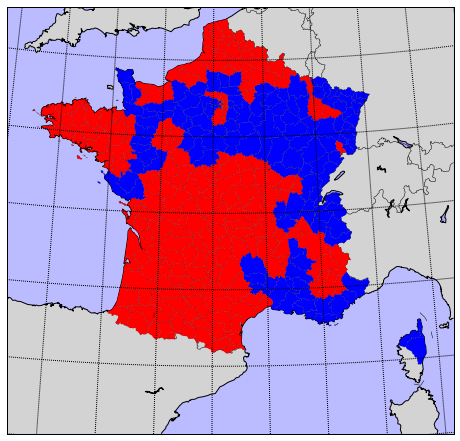

In [76]:
from matplotlib.collections import LineCollection
import numpy
import shapefile

m, ax = carte_france()

r = shapefile.Reader("fra_adm3")
shapes = r.shapes()
records = r.records()
 
for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = numpy.array(m(lons, lats)).T
 
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        # un polygone est une liste de sommets
        # on le transforme en une liste d'arêtes
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    
    # pour changer les couleurs c'est ici, il faudra utiliser le champ records
    # pour les changer en fonction du nom du départements
    dep = retourne_vainqueur(record[6])
    if dep is not None:
        couleur = "red" if dep else "blue"
        lines.set_facecolors(couleur)
        lines.set_edgecolors('k')
        lines.set_linewidth(0.1)
        ax.add_collection(lines)

La fonction fait encore une erreur pour la Corse du Sud... Je la laisse en guise d'exemple.

## exercice 3 avec les shapefile etalab

Elles sont disponibles ici : [GEOFLA® Départements](https://www.data.gouv.fr/fr/datasets/geofla-departements-30383060/).

In [77]:
from pyensae import download_data
download_data("GEOFLA_2-0_DEPARTEMENT_SHP_LAMB93_FXX_2015-07-01.7z", website="https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/GEOFLA_THEME-DEPARTEMENTS_2015$GEOFLA_2-0_DEPARTEMENT_SHP_LAMB93_FXX_2015-07-01/file/")

    downloading of  https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/GEOFLA_THEME-DEPARTEMENTS_2015$GEOFLA_2-0_DEPARTEMENT_SHP_LAMB93_FXX_2015-07-01/file/GEOFLA_2-0_DEPARTEMENT_SHP_LAMB93_FXX_2015-07-01.7z  to  GEOFLA_2-0_DEPARTEMENT_SHP_LAMB93_FXX_2015-07-01.7z


'GEOFLA_2-0_DEPARTEMENT_SHP_LAMB93_FXX_2015-07-01.7z'

In [78]:
# ici, il faut dézipper manuellement les données
# à terminer

## exercice 4 : même code, widget différent 

On utilise des checkbox pour activer ou désactiver l'un des deux candidats.

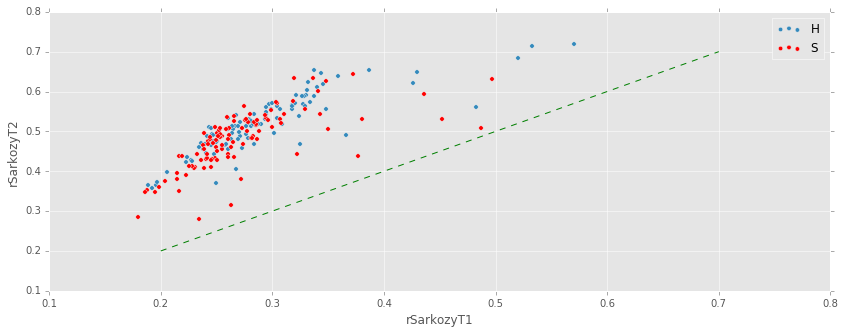

In [82]:
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, Checkbox

def plot(candh, cands):
    
    fig, axes = plt.subplots(1, 1, figsize=(14,5), sharey=True)
    if candh:
        data_elections.plot(x="rHollandeT1", y="rHollandeT2", kind="scatter", label="H", ax=axes)
    if cands:
        data_elections.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=axes, c="red")
    axes.plot([0.2,0.7], [0.2,0.7], "g--")
    return axes

candh = Checkbox(description='Hollande', value=True)
cands = Checkbox(description='Sarkozy', value=True)

interact(plot, candh=candh, cands=cands)
print("")